TENSORFLOW 卷积神经网络手写数字识别数据集介绍
http://www.tensorflownews.com/2018/03/26/tensorflow-mnist/

In [70]:
import tensorflow as tf
import numpy as np
import os, sys

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

'''
matplotlib=3.0.0 bug: https://stackoverflow.com/questions/52764148/cannot-import-matplotlib-pyplot-nonetype-object-is-not-iterable
3.0.1 对应 py368, 所以 py356 中先降级到 2.2.3
'''


'\nmatplotlib=3.0.0 bug: https://stackoverflow.com/questions/52764148/cannot-import-matplotlib-pyplot-nonetype-object-is-not-iterable\n3.0.1 对应 py368, 所以 py356 中先降级到 2.2.3\n'

In [4]:
'下载过程log: http://codepad.org/fsEmO6AI'
mnist=input_data.read_data_sets('/tmp/data/', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


mn0.shape: (784,)


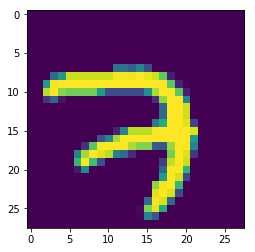

In [9]:
mnist_one=mnist.train.images[0]
mn0=mnist_one
print('mn0.shape:', mn0.shape)
w,h=28,28
mn0img=mn0.reshape(w,h)

plt.imshow(mn0img)

In [11]:
mn0img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
tf.InteractiveSession()

In [12]:
tf.nn.conv2d?

In [145]:
'''
http://www.tensorflownews.com/2018/03/27/tensorflow-step-by-step-cnn/
本文是全系列中第13 / 18篇：TensorFlow 从入门到精通
@2019-3-8 17:56:41
'''

def conv2d(x, W, b, strides=1):
    #Conv2D wrapper, with bias and relu activation
    x=tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x=tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    #MxPool2D wrapper
    ksz=[1,k,k,1]
    return tf.nn.max_pool(x, ksize=ksz, strides=ksz, padding='SAME')

#卷积神经网络
def conv_net(x, weights, biases, dropout):
    ww=28
    x=tf.reshape(x, shape=[-1,28,28,1])
    #第一层卷积
    conv1=conv2d(x, weights['wc1'], biases['bc1'])
    print('conv1', conv1)
    #第二层池化
    conv1=maxpool2d(conv1, k=2)
    print('conv1_maxpool2d', conv1)
    
    #第三层卷积
    conv2=conv2d(conv1, weights['wc2'], biases['bc2'])
    print('conv2', conv2)
    #第四层池化
    conv2=maxpool2d(conv2, k=2)
    print('conv2_maxpool2d', conv2)

    #全连接层
    tmp_shp=weights['wd1'].get_shape().as_list()[0]
    print('tmp_shp', tmp_shp)
    fc1=tf.reshape(conv2, [-1, tmp_shp])
    print('fc1_reshape', fc1)
    fc1=tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    #丢弃
    fc1=tf.nn.dropout(fc1, dropout)
    print('fc1_dropout', fc1)
    
    #输出层
    out=tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

'效果评估'
#softmax 层
logits=conv_net(X, weights, biases, keep_prob)
prediction=tf.nn.softmax(logits)


NameError: name 'X' is not defined

In [144]:
tf.nn.softmax?

In [120]:
tf.nn.bias_add?

In [141]:
tf.nn.conv2d?

In [115]:
input = tf.constant([[[[1], [2], [3]],
                      [[4], [5], [6]],
                      [[7], [8], [9]]]],dtype=tf.float32)

filter = tf.constant([[[[1]], [[2]]],
                      [[[3]], [[4]]]],dtype=tf.float32)

op = tf.nn.conv2d(input, filter, strides = [1,1,1,1], padding ='VALID') #pad: SAME / VALID

# with tf.Session() as sess:
res=op.eval()
print(res)

#转成 2D-arr 自行测试：
ti=input.eval()
ti=input.eval()[0,:,:,0]
to=filter.eval()[:,:,0,0]
ti1=ti[:2, 1:3]

ti1.ravel().dot(to.ravel()) # np.sum(ti1*to)

[[[[37.]
   [47.]]

  [[67.]
   [77.]]]]


In [140]:
'''测试 krnl 的shape中 In_channel, Out_channel 故意不同设定的后果
@2019-3-7 16:19:07
'''
in2=tf.constant(np.arange(18).reshape((1,3,3,2)), dtype=tf.float32)
filt2=tf.constant(np.arange(16).reshape((2,2,2,-1)), dtype=tf.float32)
print(in2, filt2)
op = tf.nn.conv2d(in2, filt2, strides = [1,1,1,1], padding ='VALID') #pad: SAME / VALID
# with tf.Session() as sess:
res=op.eval()
print(res, res.shape)

print(input.shape, filter.shape)

Tensor("Const_35:0", shape=(1, 3, 3, 2), dtype=float32) Tensor("Const_36:0", shape=(2, 2, 2, 2), dtype=float32)
[[[[368. 404.]
   [480. 532.]]

  [[704. 788.]
   [816. 916.]]]] (1, 2, 2, 2)
(1, 3, 3, 1) (2, 2, 1, 1)
